In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler #for scaling data
from imblearn.over_sampling import RandomOverSampler

cols = ["fLength", "fWidth", "fSize","fConc","fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist","Class"]
df = pd.read_csv("magic04.data",names=cols) #Read the data from csv into a dataframe. Pass in cols such that easier to reference
df.head() #Returns the first 5 rows in the dataframe


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


The next part allows us to use the 0s and 1s to predict if hadron or gamma

So we convert all the types where class is the learning

In [14]:
df['Class'] = (df['Class'] == "g").astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


## Split data into Train validate and test data 

In [15]:
#Splitting the data up into train validate and test data
#np.split used to split the data up such that train is the first 60%, validate is between 60 and 80 and test is the 
#remianing
train, validate, test = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))])


### Need to scale the data such that it is easier for the model to lean what is going on

In [16]:
 def scale_dataset(dataFrame, oversample=False):
        
        x = dataFrame[dataFrame.columns[:-1]].values #get all the cols apart fromt the last one as your feature
        y = dataFrame[dataFrame.columns[-1]].values #This is your 
        
        scalar = StandardScaler()
        x = scalar.fit_transform(x)
        
        
        if oversample:
            
            ros = RandomOverSampler()
            x, y = ros.fit_resample(x, y)
        
        
        
        data = np.hstack((x, np.reshape(y, (-1,1))))
        
        
        return x, y, data
    
    

        

In [17]:
#want to try and get the training data where its 0 and 1 approx the same

x_train, y_train, train = scale_dataset(train, True)
x_validate, y_validate, validate = scale_dataset(validate, False)
x_test, y_test, test = scale_dataset(test, False)



# KNN

### Using the K nearest neighbour model we can plot 

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report # get the stats 

knn_model = KNeighborsClassifier(n_neighbors=2)

knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)

y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [19]:
y_train

array([1, 1, 1, ..., 0, 0, 0])

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      1363
           1       0.87      0.82      0.84      2441

    accuracy                           0.80      3804
   macro avg       0.79      0.80      0.79      3804
weighted avg       0.81      0.80      0.81      3804



 # Logistical regression 
 
 ### We can use logistical regression to predict a binary event occuring -> Such as predicting between hadron and gamma particles

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train) # split the data between the feature vector and the label and create the model

y_pred = lg_model.predict(x_test) # Use the model on the training data
print(classification_report(y_test,y_pred)) #print classification report

              precision    recall  f1-score   support

           0       0.68      0.71      0.70      1363
           1       0.84      0.82      0.83      2441

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



# Naive bayes model
### We can use probability to find the most likely result

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [25]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.39      0.50      1363
           1       0.73      0.90      0.81      2441

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



# Neural network model

In [52]:
import tensorflow as tf
from matplotlib import pyplot as plt

In [69]:
def plot_accuracy(history):
    
    plt.plot(history.history['Accuracy'], label = 'accuracy')
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend()
    plt.grid(True)
    plt.show()
    
def plot_loss(history):
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    

In [71]:
nn_model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(64, activation ='relu', input_shape = (10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid') #by having a sigmoid on the last layer, it allows you to convert to 0.,1
])

nn_model.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = 'binary_crossentropy', metrics =['Accuracy'])

In [72]:
 history = nn_model.fit(x_train, y_train, epochs=200, batch_size = 32, validation_split=0.2, verbose =0.2)

Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 71/200
Epoch 72/200
Epoch 73/200
Epoch 74/200
Epoch 75/200
Epoch 76/200
Epoch 77/200
Epoch 78

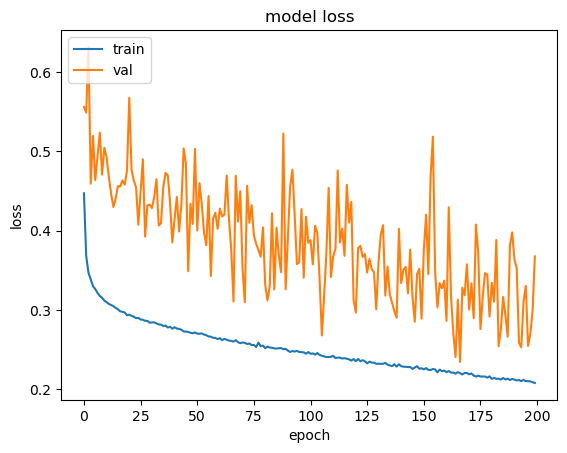

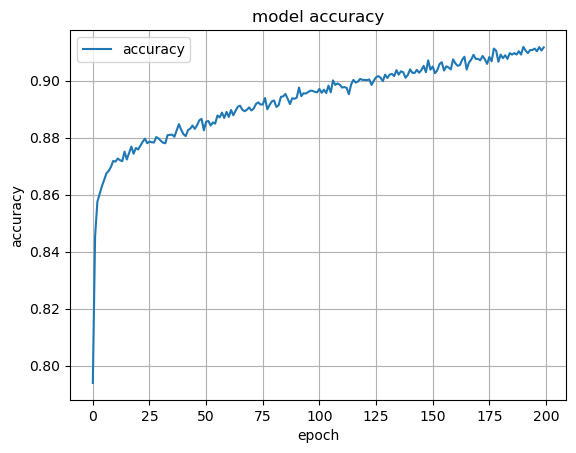

In [73]:
plot_loss(history)
plot_accuracy(history)

In [94]:
nn_model.evaluate(x_test[[7]], y_test[[7]])

1/1 [==============================] - 0s 20ms/step - loss: 6.5083e-04 - Accuracy: 1.0000


[0.0006508344667963684, 1.0]